# Introudction 


The work to follow is a forecast of demand. The point main is to determine rules of association and otimization for decision making. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
from sklearn.linear_model  import  LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split 
from sklearn.ensemble import RandomForestRegressor
from pandas_profiling import ProfileReport

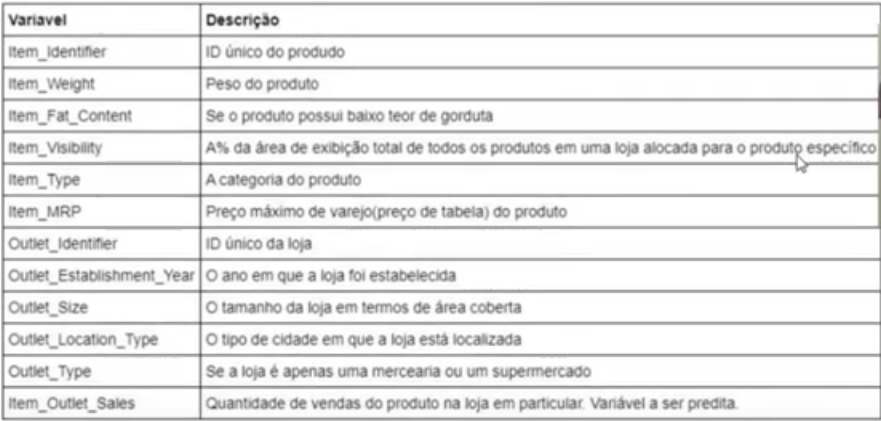

In [2]:
from PIL import Image 
%matplotlib inline 
im = Image.open('describe_dados.png')
im

In [3]:
df_Teste = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [4]:
df_Teste.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,18.100,0.022526,95.0094,2007,1713.7692,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,6.615,0.093575,199.4426,2002,3361.6242,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,11.850,0.050187,164.1526,2002,3124.5994,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,13.500,0.159969,147.6102,1999,1603.9122,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
4,14.000,0.029769,145.4786,1999,1300.3074,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0


Identificando e sabendo quais as variaveis a serem trabalhadas, teremos a interpretação dos dados da seguinte forma, os dados de tipo estão disposto em  

In [6]:
profile = ProfileReport(df_train, title = "Vendas Supermercado DIA-A-DIA ")
profile.to_notebook_iframe()

Verifica valores missing oq é ? 

In [8]:
train_x = df_train.drop(columns=['Item_Outlet_Sales'],axis=1)
train_y = df_train['Item_Outlet_Sales']

test_x = df_Teste.drop(columns = ['Item_Outlet_Sales'], axis=1)
test_y = df_Teste['Item_Outlet_Sales']

In [10]:
modelo1 = LinearRegression()
#podemos alterar os parametros para melhor ajustar a reta, veja a documentação em sklearn.

In [13]:
modelo1.fit(train_x,train_y)
print('Coeficiente: ', modelo1.coef_)
print('Intercept: ',modelo1.intercept_)

Coeficiente:  [-3.84197604e+00  9.83065945e+00  1.61711856e+01  6.09197622e+01
 -8.64161561e+01  1.23593376e+02  2.34714039e+02 -2.44597425e+02
 -2.72938329e+01 -8.09611456e+00 -3.01147840e+02  1.70727611e+02
 -5.40194744e+01  7.34248834e+01  1.70313375e+00 -5.07701615e+01
  1.63553657e+02 -5.85286125e+01  1.04913492e+02 -6.01944874e+01
  1.98948206e+02 -1.40959023e+02  1.19426257e+02  2.66382669e+01
 -1.85619792e+02  1.43925357e+03  2.16134663e+02  3.54723990e+01
  3.54832996e+02 -5.54559635e+00 -3.49287400e+02 -1.39202954e+03
 -2.57982359e+02 -9.59016062e+02  2.60902796e+03]
Intercept:  -121926.974732983


In [14]:
predict_train = modelo1.predict(train_x)
print('Previsão para dados de treino: ', predict_train)

Previsão para dados de treino:  [ 803.88817641 1733.98835979 3294.52154482 ...  811.16967914 2343.96927185
 2444.98869913]


In [15]:
rmse_train = mean_squared_error(train_y,predict_train)**(0.5)
print('RMSE TRAIN: ',rmse_train)

RMSE TRAIN:  1135.8159344155242


In [16]:
predict_test = modelo1.predict(test_x)
print('Previsão para dados de teste: ',predict_test)

Previsão para dados de teste:  [ 1615.37962439  3168.60806673  2564.31326686  2685.29698657
  2771.82059109  4223.3788671   2615.10827403   565.8088248
  4000.68496927  1035.54578573  2184.60316447  1033.54185437
   150.22804639  1616.19932803  2370.37858454  1953.693325
  2307.09514556  1429.85271583  2343.42149697  3780.28905363
   583.44339124  1089.08346168  2323.64661483  3559.90832258
  1829.46789667  1602.03985138   840.70282292  1823.14253132
  3145.30906529  1823.30397678  2103.35401623  3025.02597477
  2265.03907268   697.33936172  4474.05156681  2270.45195749
  1897.45212218  3305.0110824   2228.36615412  3767.90052861
  2162.33844917   665.40410258  -926.22966666   738.30407877
   197.90808777  2483.25075805  3693.05388376  2458.43116228
  1329.02544771   -57.67123156  1952.26612825  3614.4167807
  2127.22359714  2486.1932574   1826.90446272   786.7283994
  3200.67525412  1981.66000538  2326.98747373  3535.12951812
    53.4756877    129.4629475   4259.8975191   3732.1522598

In [17]:
rmse_test = mean_squared_error(test_y,predict_test)**(0.5)
print('RMSE TEST: ',rmse_test)

RMSE TEST:  1009.2517232209684


In [18]:
modelo2 = RandomForestRegressor(max_depth=10)
modelo2.fit(train_x,train_y)

predict_traino = modelo2.predict(train_x)
predict_teste = modelo2.predict(test_x)

print('RMSE TRAIN: ', mean_squared_error(train_y,predict_traino)**(0.5))
print('RMSE TESTE: ', mean_squared_error(test_y,predict_teste)**(0.5))

RMSE TRAIN:  712.2442826398777
RMSE TESTE:  1010.8563597862053
